In [3]:
import numpy as np 

from scipy.integrate import solve_ivp

import pde

import matplotlib as mpl
import matplotlib.pyplot as plt 

from haar import haar as haar1

from haar import haar
from pi2 import pi2 
from pi1 import pi1

from scipy import integrate


mpl.style.use('seaborn')

In [9]:
def wavelet_solve(J, n): 
    N = 2**(J + 1) 
    j = np.arange(0, N)
    x = (j - 0.5) / N

    alpha1 = 0.
    beta1 = -1.
    a1 = beta1 - alpha1 

    W = np.zeros((N, N)) 
    f = np.zeros((N, )) 
    a = np.zeros((N, ))

    eps = 1e-6
    gradepstol = 1e-3
    r = np.ones((N, 1))

    iter_idx = 0 

    while max(r) > eps: 
        #for j in range(N): 
        #    H = P1 = P2 = 0 
        H = np.zeros((N, ))
        P1 = np.zeros((N, ))
        P2 = np.zeros((N, ))

        for i in range(N): 
            H += a[i] * haar(x, i+1, J) 
            P1 += a[i] * pi1(x, i+1, J)             
            P2 += a[i] * pi2(x, i+1, J) 

        #print(H.shape, P1.shape, P2.shape)
        #print(f.shape)
        f = n * (alpha1 + beta1 * x + P2) * (beta1 + P1) + H 
        #print(f.shape)

        for k in range(N): 
            W[:, k] = n * pi2(x, k+1, J) * (beta1 + P1) + n * (alpha1 + beta1 + x + P2) * pi1(x, k+1, J)  + haar(x, k+1, J)

        #print(W.shape, (W@a).shape, f.shape)
        a_new = np.linalg.pinv(W) @ (W@a - f)
        #print(np.linalg.pinv(W).shape, (W@a - f).shape)
        #print(a_new.shape)
        #a_new = lstsq(W, W@a - f, cond=None)[0]
        #a_new = solve(W, W@a - f) # singularities 
        #a_new = scipy.linalg.inv(W) @ (W@a - f)
        #print(a_new.shape)
        r = np.abs(a_new - a) 
        #print(r.shape)
        print(max(r)) 

        a = a_new 
        iter_idx += 1


    y = np.zeros((N, ))
    S = np.zeros((N, ))

    for i in range(N): 
        S += a[i] * pi2(x, i+1, J)

    y = alpha1 + x * beta1 + S 

    return y, x


In [12]:
from scipy.special import airy

def exactairynl(m, n, x): 
    ai1, aip1, bi1, bip1 = airy(- n / (2* m * n)**(2/3))
    ai2, aip2, bi2, bip2 = airy(n * (m * x - 1) / (2* m * n)**(2/3))

    return 2**(2/3) * m / (m * n) ** (2/3) * ((aip1 * bip2) - bip1*aip2) / (aip1*bi2 - bip1*ai2)

def exactnl(n, x): 
    return - np.sqrt(2/n) * np.tan(np.sqrt(n/2) * x)


In [20]:
from scipy import integrate

def integratornl1param(n, x, method): 
    def _integrator(t, Y): 
        return [Y[1], -n * Y[0] * Y[1]]
    
    res = integrate.solve_ivp(_integrator, t_span=[min(x), max(x)], y0=[0, -1], t_eval=x, method=method) # , method='Radau'
    return res.t, res.y[0, :]
    #return integrate.solve_ivp(_integrator, t_span=[min(x), max(x)], y0=[0, -1], t_eval=x, method=method).y[0, :] # , method='Radau'

In [136]:
from scipy import integrate

def integratornl1paramopt(n, method): 
    def _integrator(t, Y): 
        return [Y[1], -n * Y[0] * Y[1]]
    
    res = integrate.solve_ivp(_integrator, t_span=[0, 1], y0=[0, -1],  method=method) # , method='Radau'
    return res.t, res.y[0, :]
    #return integrate.solve_ivp(_integrator, t_span=[min(x), max(x)], y0=[0, -1], t_eval=x, method=method).y[0, :] # , method='Radau'

In [8]:
def wavelet_solve_maspring(J, n): 
    N = 2**(J + 1) 
    j = np.arange(0, N)
    x = (j - 0.5) / N

    alpha1 = 10.
    beta1 = 0.
    a1 = beta1 - alpha1 

    W = np.zeros((N, N)) 
    f = np.zeros((N, )) 
    a = np.zeros((N, ))

    eps = 1e-6
    gradepstol = 1e-3
    r = np.ones((N, 1))

    iter_idx = 0 

    while max(r) > eps: 
        #for j in range(N): 
        #    H = P1 = P2 = 0 
        H = np.zeros((N, ))
        P1 = np.zeros((N, ))
        P2 = np.zeros((N, ))

        for i in range(N): 
            H += a[i] * haar(x, i+1, J) 
            P1 += a[i] * pi1(x, i+1, J)             
            P2 += a[i] * pi2(x, i+1, J) 

        #print(H.shape, P1.shape, P2.shape)
        #print(f.shape)
        #f = n * (alpha1 + beta1 * x + P2) * (beta1 + P1) + H 
        f  = 1001 * (beta1 + P1) + 1000*(alpha1+beta1*x + P2) + H 
        #print(f.shape)

        for k in range(N): 
            W[:, k] = n * pi2(x, k+1, J) * (beta1 + P1) + n * (alpha1 + beta1 + x + P2) * pi1(x, k+1, J)  + haar(x, k+1, J)

        #print(W.shape, (W@a).shape, f.shape)
        a_new = np.linalg.pinv(W) @ (W@a - f)
        #print(np.linalg.pinv(W).shape, (W@a - f).shape)
        #print(a_new.shape)
        #a_new = lstsq(W, W@a - f, cond=None)[0]
        #a_new = solve(W, W@a - f) # singularities 
        #a_new = scipy.linalg.inv(W) @ (W@a - f)
        #print(a_new.shape)
        r = np.abs(a_new - a) 
        #print(r.shape)
        print(max(r)) 

        a = a_new 
        iter_idx += 1


    y = np.zeros((N, ))
    S = np.zeros((N, ))

    for i in range(N): 
        S += a[i] * pi2(x, i+1, J)

    y = alpha1 + x * beta1 + S 

    return y, x


In [17]:
def L2_error(approx, exact): 
    return np.sqrt(1 / len(approx) * np.sum((exact-approx)**2)) 

/tmp/ipykernel_192486/3431742054.py:1: RuntimeWarning: overflow encountered in exp
  exactmass = lambda x : 10 * np.exp(-1000 * x) * (1000 * np.exp(999*x) - 1) / 999
/tmp/ipykernel_192486/3431742054.py:1: RuntimeWarning: invalid value encountered in multiply
  exactmass = lambda x : 10 * np.exp(-1000 * x) * (1000 * np.exp(999*x) - 1) / 999


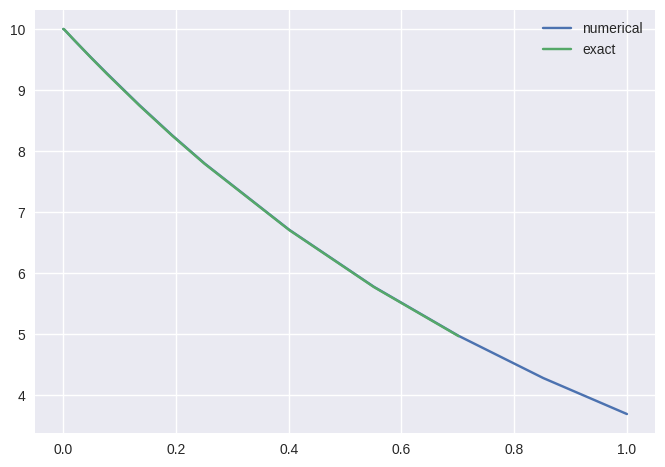

In [7]:
exactmass = lambda x : 10 * np.exp(-1000 * x) * (1000 * np.exp(999*x) - 1) / 999 

def _intmaspring(t, Y): 
    return [Y[1], - 1000 * Y[0] - 1001 * Y[1]]

res = integrate.solve_ivp(_intmaspring, t_span=[0, 1], y0=[10, 0], method="LSODA") # , method='Radau'

plt.plot(res.t, res.y[0, :], label="numerical") 
plt.plot(res.t, exactmass(res.t), label="exact")
plt.legend()

4.469907196599369
20.39919481073751
28.38331031555581
12.805900236041786
3.5173463750558653
0.7255564070780594
0.1279286626461129
0.01989562903412434
0.002800516344592552
0.00035988351523030815
4.287445622708219e-05
4.767998184718181e-06
5.003632779221334e-07


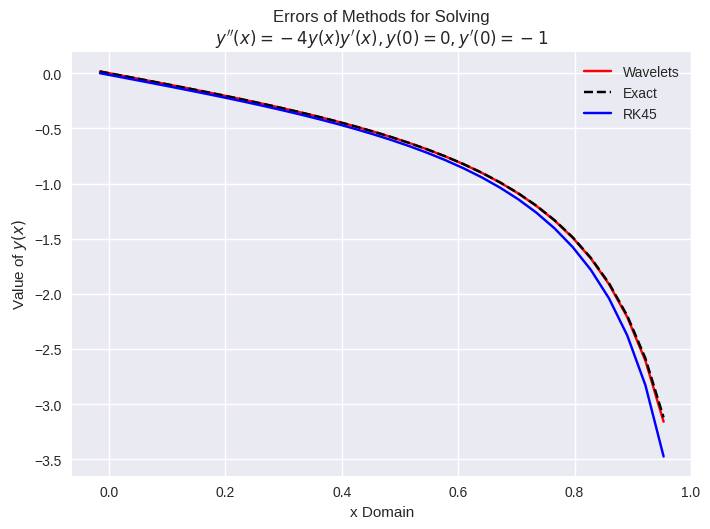

In [15]:
m = 1
n = 4
stest, stestx = wavelet_solve(4, n)
#exacteval  = exactairynl(m, -n, stestx)
exacteval = exactnl(n, stestx)
_, spysoln = integratornl1param(n, stestx, "Radau")
plt.plot(stestx, stest, 'r', label='Wavelets')
plt.plot(stestx, exacteval, 'k--', label="Exact")
plt.plot(stestx, spysoln, 'b-', label='RK45')
plt.title(rf"Errors of Methods for Solving" +"\n" + rf"$y''(x) = - 4y(x) y'(x), y(0) = 0, y'(0) = -1$")
plt.xlabel("x Domain")
plt.ylabel(r"Value of $y(x)$")
plt.legend()

In [19]:
yexact = exactnl(n, stestx)

l2_wavelet = L2_error(stest, yexact)

l2_wavelet

0.00839075853289184

In [137]:
l2_errors = {"RK23": [], "RK45": [], "BDF": [], "LSODA": [], "Radau": []}
l2_wavelets = []
JMAX = 9
n = 4

for J in range(1, JMAX): 
    y, x = wavelet_solve(J, n) 

    #yexact = - np.tan(x) 
    yexact = exactnl(n, x)

    l2_wavelet = L2_error(y, yexact)
    l2_wavelets.append(l2_wavelet)
    #ax.plot()  

    for method in ["RK23", "RK45", "BDF", "LSODA", "Radau"]:

        #integrator_soln = integrate.solve_ivp(_integrator, t_span=[min(x), max(x)], t_eval=x, y0=[0, -1], method=method) # , t_eval=x
        #integrator_soln = integrate.solve_ivp(_integrator, t_span=[0, 1], y0=[0, -1], method=method)
        xs, spysoln = integratornl1paramopt(n, method)
        
        #print(integrator_soln.t.shape)
        #y_exactfull = -np.tan(xs)
        y_exactfull = exactnl(n, xs)
        err = L2_error(y_exactfull, spysoln)
#       err = L2_error(yexact, integrator_soln.y[0, :])
        #err = L2_error(yexact, spysoln)
        l2_errors[method].append(err)


2.2551892551892565
1.5732968649059038
0.6821848567133602
0.2869996436147262
0.11800163263085395
0.049101493801380514
0.020359313738125273
0.008468384134821427
0.0035193498131675938
0.001463710930746931
0.000608626774441845
0.000253120544653207
0.00010526372462216216
4.3777388617272095e-05
1.8206002195597648e-05
7.571539817341488e-06
3.1488517482358702e-06
1.30954801358385e-06
5.446157942401442e-07
3.000285175699558
4.182589917832597
4.469901605947144
2.592481754203005
1.1752270678176444
0.47455908504081457
0.18062160713677322
0.06658857514907979
0.02411997700445312
0.008650808225546314
0.003085356503820691
0.001096912155453822
0.0003892698442733433
0.00013800035780953124
4.889370952376737e-05
1.7317257551496823e-05
6.1322724853596355e-06
2.171280208074222e-06
7.687459824268217e-07
3.2942341953278644
8.24522823960468
10.789214453454491
8.905574839846318
4.820682655470602
1.993752772177313
0.6976433415816743
0.21834247534920692
0.06320541389663958
0.017298999691139016
0.00454491731237993

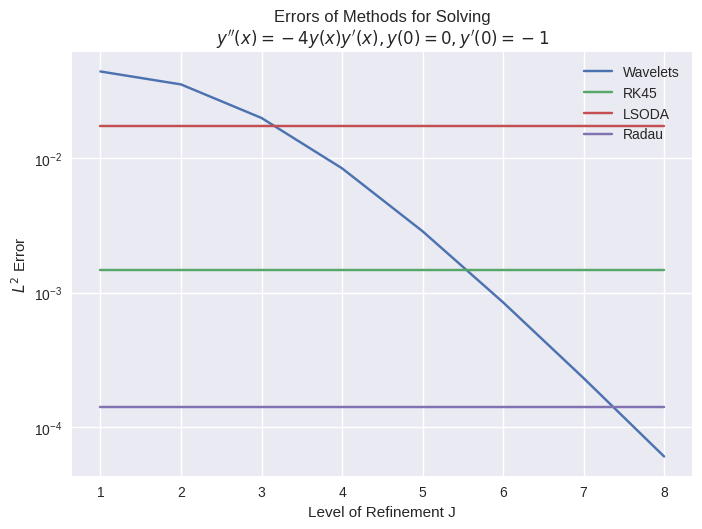

In [139]:
plt.plot(range(1, JMAX), l2_wavelets, label="Wavelets")

for k, v in l2_errors.items(): 
    if k not in ['BDF', 'RK23']:
        plt.plot(range(1, JMAX), v, label=k)

plt.title(rf"Errors of Methods for Solving" +"\n" + rf"$y''(x) = - 4 y(x) y'(x), y(0) = 0, y'(0) = -1$")
plt.yscale("log")
plt.xticks(range(1, JMAX))
plt.xlabel("Level of Refinement J")
plt.ylabel("$L^2$ Error")
plt.legend()

In [140]:
l2_errors = {"RK23": [], "RK45": [], "BDF": [], "LSODA": [], "Radau": []}
l2_wavelets = []
JMAX = 9
n = 4

for J in range(1, JMAX): 
    y, x = wavelet_solve(J, n) 

    #yexact = - np.tan(x) 
    yexact = exactnl(n, x)

    l2_wavelet = L2_error(y, yexact)
    l2_wavelets.append(l2_wavelet)
    #ax.plot()  

    for method in ["RK23", "RK45", "BDF", "LSODA", "Radau"]:

        #integrator_soln = integrate.solve_ivp(_integrator, t_span=[min(x), max(x)], t_eval=x, y0=[0, -1], method=method) # , t_eval=x
        #integrator_soln = integrate.solve_ivp(_integrator, t_span=[0, 1], y0=[0, -1], method=method)
        xs, spysoln = integratornl1param(n, x, method)
        
        yexactfull = exactnl(n, xs)
        #print(integrator_soln.t.shape)
        #y_exactfull = -np.tan(xs)
#        err = L2_error(yexact, integrator_soln.y[0, :])
        err = L2_error(yexact, spysoln)
        l2_errors[method].append(err)


2.2551892551892565
1.5732968649059038
0.6821848567133602
0.2869996436147262
0.11800163263085395
0.049101493801380514
0.020359313738125273
0.008468384134821427
0.0035193498131675938
0.001463710930746931
0.000608626774441845
0.000253120544653207
0.00010526372462216216
4.3777388617272095e-05
1.8206002195597648e-05
7.571539817341488e-06
3.1488517482358702e-06
1.30954801358385e-06
5.446157942401442e-07
3.000285175699558
4.182589917832597
4.469901605947144
2.592481754203005
1.1752270678176444
0.47455908504081457
0.18062160713677322
0.06658857514907979
0.02411997700445312
0.008650808225546314
0.003085356503820691
0.001096912155453822
0.0003892698442733433
0.00013800035780953124
4.889370952376737e-05
1.7317257551496823e-05
6.1322724853596355e-06
2.171280208074222e-06
7.687459824268217e-07
3.2942341953278644
8.24522823960468
10.789214453454491
8.905574839846318
4.820682655470602
1.993752772177313
0.6976433415816743
0.21834247534920692
0.06320541389663958
0.017298999691139016
0.00454491731237993

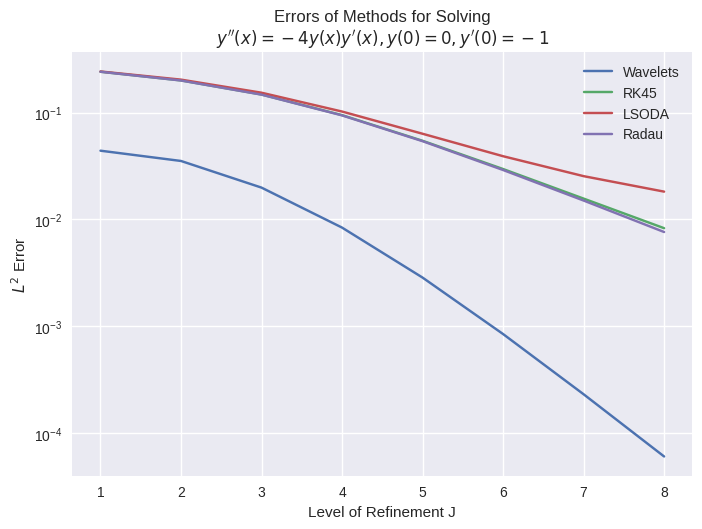

In [142]:
plt.plot(range(1, JMAX), l2_wavelets, label="Wavelets")

for k, v in l2_errors.items(): 
    if k not in ['BDF', 'RK23']:

        plt.plot(range(1, JMAX), v, label=k)

plt.title(rf"Errors of Methods for Solving" +"\n" + rf"$y''(x) = - 4 y(x) y'(x), y(0) = 0, y'(0) = -1$")
plt.yscale("log")
plt.xticks(range(1, JMAX))
plt.xlabel("Level of Refinement J")
plt.ylabel("$L^2$ Error")
plt.legend()

In [123]:
print(L2_error(exacteval, stest), L2_error(exacteval, spysoln))


0.008390758535330677 0.09453196928673187


In [51]:
print(L2_error(exacteval, stest), L2_error(exacteval, spysoln))


0.0017361380003599726 0.04464027669441276


In [47]:
print(L2_error(exacteval, stest), L2_error(exacteval, spysoln))


0.016459583294324596 0.13910942474151283


In [18]:
print(L2_error(exacteval, stest), L2_error(exacteval, spysoln))


0.12026511975610966 0.42785356315606676


2.677726695812761
5.265629471386213
3.670772508636638
1.1404205837884742
0.23876374433170255
0.038609604974499945
0.005152195845088414
0.0005853824900796667
5.799604413958548e-05
5.377717694265982e-06
4.484543625338233e-07
2.986791450945028
7.048945664681268
5.765616220659975
2.035656288146077
0.4484604470081326
0.07632904629464043
0.010787706256511598
0.0013041260252251163
0.00014003667645390294
1.3905748575737675e-05
1.239747387415946e-06
1.0028941588302587e-07
3.3210952856721936
9.756705545226179
9.490165664683557
3.744638601662434
0.8662565844178367
0.1542003614162084
0.02294099822411866
0.0029348032643738975
0.0003431405266205445
3.616489013325008e-05
3.4308503167324034e-06
2.9586254335356443e-07
3.6829070643669937
13.563282506358119
16.239667199179138
7.177952990696717
1.7458756773582067
0.3231101765199256
0.050292481927300514
0.00692988140366424
0.0008643876951879292
9.621200974763156e-05
9.667853184680553e-06
8.849027359758566e-07
4.0747081232397075
18.96197198210927
28.5946254

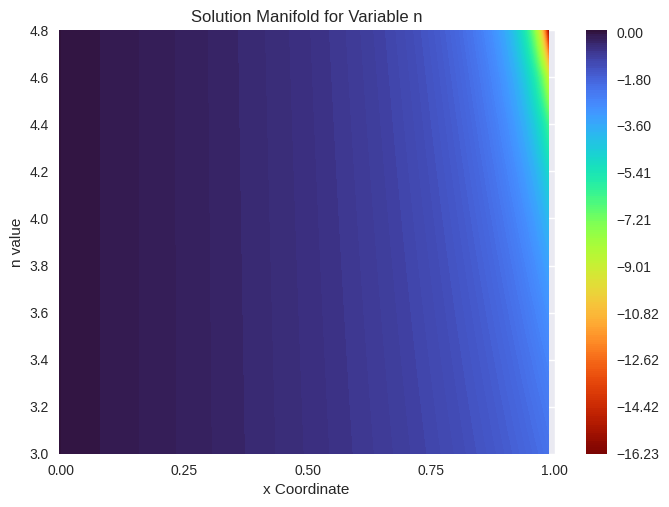

In [23]:
#%matplotlib widget
from matplotlib import cm

#xs = np.linspace(0, 1, 100) 
J = 6
N = 2**(J + 1) 
j = np.arange(0, N)
xs = (j - 0.5) / N

ns = np.linspace(3, 4.8, 10)

X, N = np.meshgrid(xs, ns)
evals = []
evals_lib = []
evals_wavelets = []

for n in ns: 
    evals.append(exactnl(n, xs))
    evals_lib.append(integratornl1param(n, xs, 'RK45')[1])
    evals_wavelets.append(wavelet_solve(J, n)[0])

evals = np.array(evals)
evals_lib = np.array(evals_lib)
evals_wavelets = np.array(evals_wavelets)
#evals.shape, X.shape, N.shape
#fig, ax = plt.subplots(subplot_kw = dict(projection="3d"), constrained_layout=1)
fig1, ax2 = plt.subplots()

#ax.plot_surface(X, N, evals)
cs = ax2.contourf(X, N, evals, 250, cmap=cm.turbo_r)
plt.xlabel("x Coordinate")
plt.ylabel("n value")
plt.title("Solution Manifold for Variable n")
plt.xticks(np.linspace(0, 1, 5))

v1 = np.linspace(evals.min(), evals.max(), 10, endpoint=True)
cbar = plt.colorbar(cs, ticks=v1)

In [55]:
evals.shape, evals_lib.shape

((50, 100), (50, 100))

In [24]:

L2evals = L2_error(evals, evals_lib)

In [94]:
N.shape, X.shape

((50, 100), (50, 100))

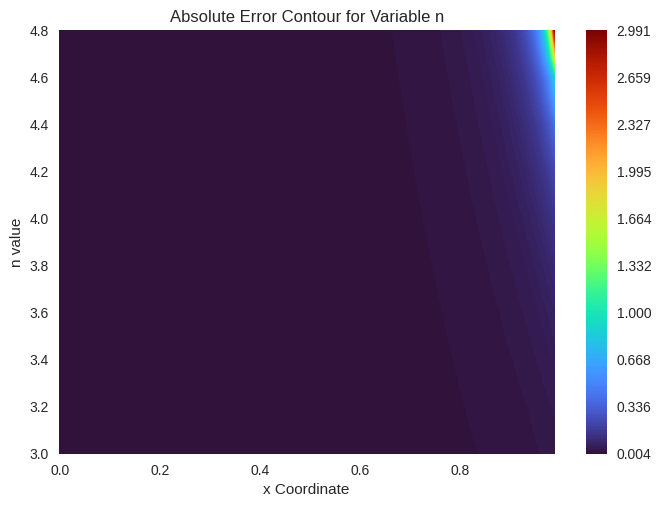

In [25]:
fig2, ax3 = plt.subplots()
abserr =  (np.abs(evals - evals_lib))
#ax.plot_surface(X, N, evals)
cs = ax3.contourf(X, N, abserr, 1000, cmap=cm.turbo)
plt.xlabel("x Coordinate")
plt.ylabel("n value")
plt.title("Absolute Error Contour for Variable n")
v1 = np.linspace(abserr.min(), abserr.max(), 10, endpoint=True)
cbar = plt.colorbar(cs, ticks=v1)


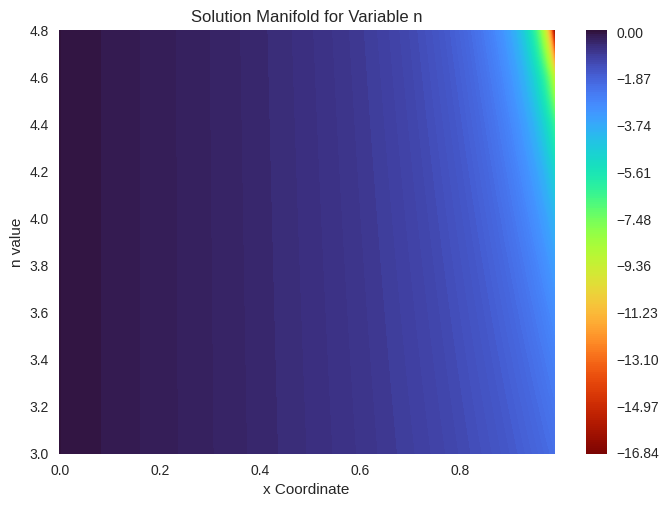

In [26]:
fig3, ax4 = plt.subplots()

#ax.plot_surface(X, N, evals)
cs = ax4.contourf(X, N, evals_wavelets, 250, cmap=cm.turbo_r)
plt.xlabel("x Coordinate")
plt.ylabel("n value")
plt.title("Solution Manifold for Variable n")
v1 = np.linspace(evals_wavelets.min(), evals_wavelets.max(), 10, endpoint=True)
cbar = plt.colorbar(cs, ticks=v1)

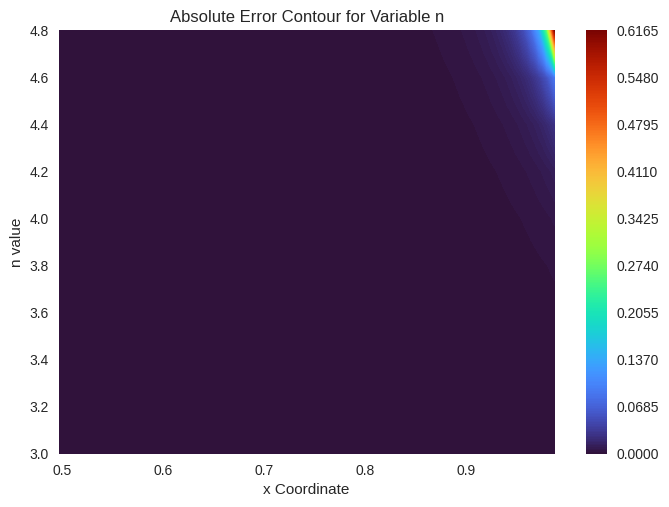

In [27]:
fig4, ax5 = plt.subplots()
abserr =  (np.abs(evals - evals_wavelets))
#ax.plot_surface(X, N, evals)
cs = ax5.contourf(X[:, 64:], N[:, 64:], abserr[:, 64:], 1000, cmap=cm.turbo)
plt.xlabel("x Coordinate")
plt.ylabel("n value")
plt.title("Absolute Error Contour for Variable n")
v1 = np.linspace(abserr.min(), abserr.max(), 10, endpoint=True)
cbar = plt.colorbar(cs, ticks=v1)


In [165]:
X.shape

(10, 128)

Text(0.5, 0.98, 'Absolute Error Contour for Variable n for J=6')

<Figure size 1280x1280 with 0 Axes>

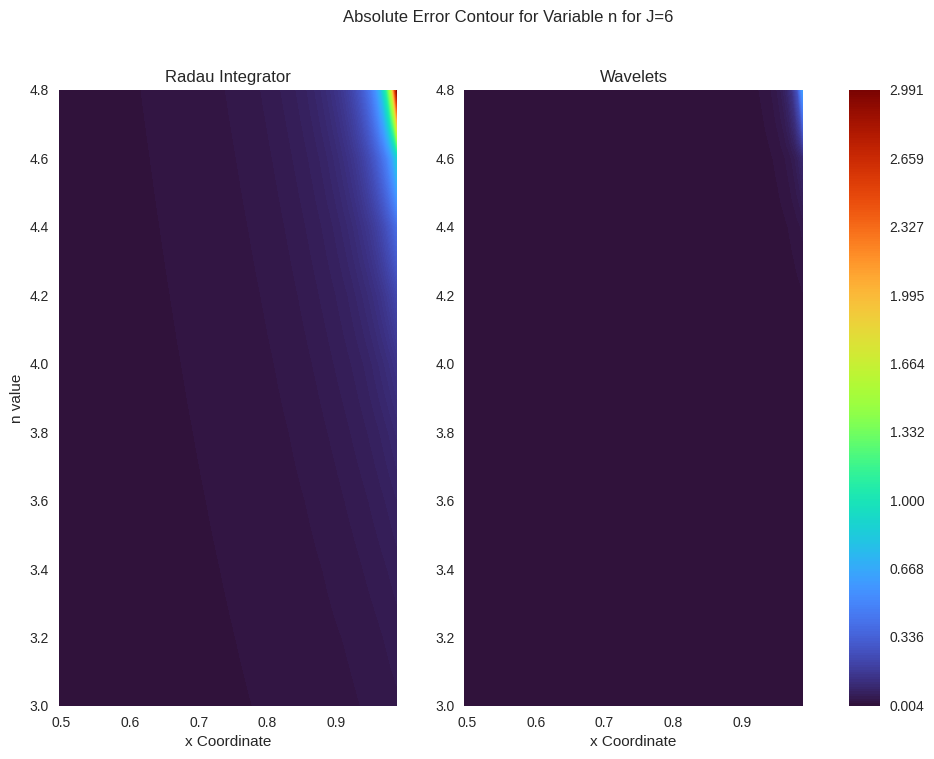

In [174]:

from matplotlib.pyplot import figure
figure(figsize=(16, 16), dpi=80)


fig6, ax7 = plt.subplots(nrows=1, ncols=2)

fig6.set_figheight(8)
fig6.set_figwidth(12)

abserr =  (np.abs(evals - evals_lib))

levels = np.linspace(0., abserr.max(), 10000, endpoint=True)

plt.sca(ax7[0])
cs1 = ax7[0].contourf(X[:, 64:], N[:, 64:], abserr[:, 64:], levels=levels, cmap=cm.turbo)
plt.xlabel("x Coordinate")
plt.ylabel("n value")
plt.title("Radau Integrator")
v1 = np.linspace(abserr.min(), abserr.max(), 10, endpoint=True)
#cbar = plt.colorbar(cs, ticks=v1)

abserr =  (np.abs(evals - evals_wavelets))

plt.sca(ax7[1])
cs2 = ax7[1].contourf(X[:, 64:], N[:, 64:], abserr[:, 64:], levels=levels, cmap=cm.turbo)
plt.xlabel("x Coordinate")
#plt.ylabel("n value")
plt.title("Wavelets")
v2 = np.linspace(abserr.min(), abserr.max(), 10, endpoint=True)
#cbar = plt.colorbar(cs, ticks=v1)

plt.colorbar(cs1, ax = ax7, ticks=v1)

plt.suptitle("Absolute Error Contour for Variable n for J=6")



Text(0.5, 1.0, 'Collocation Points for 3 Levels of Refinement')

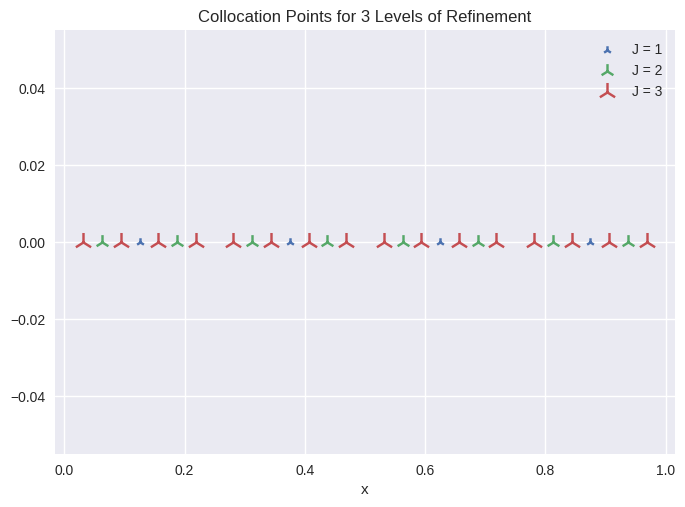

In [23]:
J = 1
for J in range(1, 4): 
    N = 2**(J + 1) 
    j = np.arange(0, N)
    x = (j + 0.5) / N
    plt.scatter(x, np.zeros(x.shape), (J-1/2)*75, marker="2", label=f'J = {J}')

plt.legend()
plt.xlabel("x")
plt.title("Collocation Points for 3 Levels of Refinement")

  0%|          | 0/10.0 [00:00<?, ?it/s]

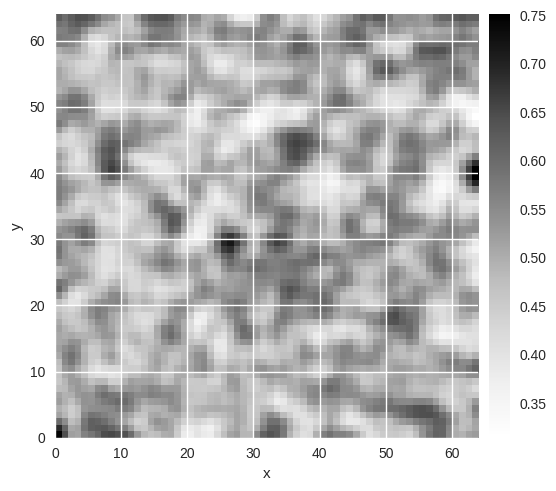

In [2]:
grid = pde.UnitGrid([64, 64])                 # generate grid
state = pde.ScalarField.random_uniform(grid)  # generate initial condition

eq = pde.DiffusionPDE(diffusivity=0.1)        # define the pde
result = eq.solve(state, t_range=10)          # solve the pde
result.plot()                                 # plot the resulting field

In [ ]:
eq = pde.PDE({'c' : ''})

In [49]:
import numpy as np

def haar(x, i, J):
    if i == 1:
        m = k = 0
    else:
        IMat = np.zeros([J+1, 2**J])
        IMask = np.zeros([J+1, 2**J])

        ind_s = 1
        for ind_j in range(J+1):
            for ind_i in range(2**ind_j):
                ind_s += 1
                IMask[ind_j, ind_i] = ind_s
                IMat[ind_j, ind_i] = ind_i+ind_j+1

        ind_j, ind_i = np.where(IMask == i)
        m = 2**ind_j
        k = ind_i

    #y = np.zeros([1, len(x)])
    y = np.zeros([len(x), 1])


    if i == 1:
        for j in range(len(x)):
            if 0 <= x[j] < 1:
                y[j, 0] = 1 
                #y[0, j] = 1
            else:
                y[j, 0] = 0
                #y[0, j] = 0
    else:
        alpha = k / m
        beta = (k + 0.5) / m
        gamma = (k + 1) / m
        print(f'a: {alpha}\n')
        print(f'b: {beta}\n')
        print(f'g: {gamma}\n')
        for j in range(len(x)):
            if alpha <= x[j] < beta:
                y[j, 0] = 1 
                #y[0, j] = 1
            elif beta <= x[j] < gamma:
                y[j, 0] = -1
                #y[0, j] = -1
            else:
                y[j, 0] = 0
                #y[0, j] = 0

    return y

In [4]:
def pi1(x, i, J): 
    if i == 1: 
        m = k = 0
    else: 
        IMat = np.zeros([J+1, 2**J])
        IMask = np.zeros([J+1, 2**J])

        ind_s = 1 

        for ind_j in range(J+1): 
            for ind_i in range(2**ind_j):
                ind_s +=1 
                IMask[ind_j, ind_i] = ind_s
                IMat[ind_j, ind_i] = ind_i + ind_j+1

        m, k = np.where(IMask == i) 
        m = 2**m 

    y = np.zeros([1, len(x)])

    if i == 1: 
        for i in range(len(x)): 
            if 0 <= x[i] < 1: 
                y[0, i] = x[i]
            else: 
                y[0, i] = 0 

    else: 
        alpha = k/m
        beta  = (k+0.5)/m 
        gamma = (k+1)/m

        for i in range(len(x)): 
            if alpha <= x[i] < beta: 
                y[0, i] = x[i] - alpha 
            elif beta <= x[i] < gamma: 
                y[0, i] = gamma - x[i]
            else: 
                y[0, i] = 0 

    return y

In [5]:
def pi2(x, i, J): 
    if i == 1: 
        m = k = 0
    else: 
        IMat = np.zeros([J+1, 2**J])
        IMask = np.zeros([J+1, 2**J])

        ind_s = 1

        for ind_j in range(J+1): 
            for ind_i in range(2**ind_j): 
                ind_s += 1 
                IMask[ind_j, ind_i] = ind_s
                IMat[ind_j, ind_i] = ind_i + ind_j + 1 

        m, k = np.where(IMask == i) 
        m = 2**m 


    y = np.zeros([1, len(x)])

    if i == 1: 
        for i in range(len(x)): 
            if 0 <= x[i] < 1: 
                y[0, i] = 0.5 * x[i]**2 
            else: 
                y[0, i] = 0 
    else: 
        alpha = k/m
        beta  = (k+0.5)/m 
        gamma = (k+1)/m

        for i in range(len(x)): 
            if alpha <= x[i] < beta: 
                y[0, i] = 0.5 * (x[i] - alpha)**2 
            elif beta <= x[i] < gamma: 
                y[0, i] = 1 / (4 * m**2) - 0.5 * (gamma - x[i]) ** 2 
            elif gamma <= x[i] < 1 : 
                y[0, i] = 1 / (4 * m**2) 
            else: 
                y[0, i] = 0


    return y 

In [56]:
def haar(x, i, J):
    if i == 1:
        m = k = 0
    else:
        IMat = np.zeros([J+1, 2**J])
        IMask = np.zeros([J+1, 2**J])

        ind_s = 1
        for ind_j in range(J+1):
            for ind_i in range(2**ind_j):
                ind_s += 1
                IMask[ind_j, ind_i] = ind_s
                IMat[ind_j, ind_i] = ind_i+ind_j+1

        ind_j, ind_i = np.where(IMask == i)
        m = 2**ind_j
        k = ind_i

    
    #y = np.zeros([1, len(x)])
    y = np.zeros((len(x), ))
    

    # TODO: vectorize setting these 
    if i == 1:
        for j in range(len(x)):
            if 0 <= x[j] < 1:
                y[j] = 1
                #y[j, 0] = 1
                #y[0, j] = 1
            else:
                y[j] = 0
                #y[j, 0] = 0
                #y[0, j] = 0
    else:
        alpha = k / m
        beta = (k + 0.5) / m
        gamma = (k + 1) / m

        for j in range(len(x)):
            if alpha <= x[j] < beta:
                y[j] = 1
                #y[j, 0] = 1
                #y[0, j] = 1
            elif beta <= x[j] < gamma:
                y[j] = -1
                #y[j, 0] = -1
                #y[0, j] = -1
            else:
                y[j] = 0
                #y[j, 0] = 0
                #y[0, j] = 0

    return y #, m, k

In [50]:
J = 3 
N = 2**(J + 1) 
j = np.arange(0, N)
x = (j - 0.5) / N

haar1(x, 1, J).shape

(1, 16)

In [42]:
x.shape

(16,)

ValueError: x and y must have same first dimension, but have shapes (4,) and (512,)

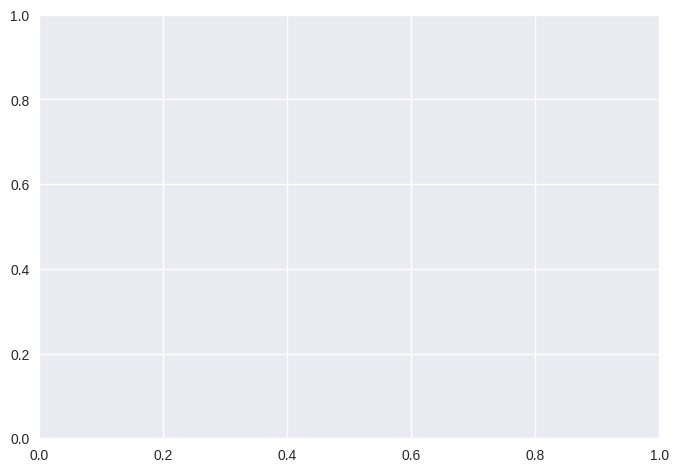

In [178]:
J = 1 
N = 2**(J + 1) 
j = np.arange(0, N)
x = (j - 0.5) / N

haar(x, 1, J).shape

plt.plot(x, y)

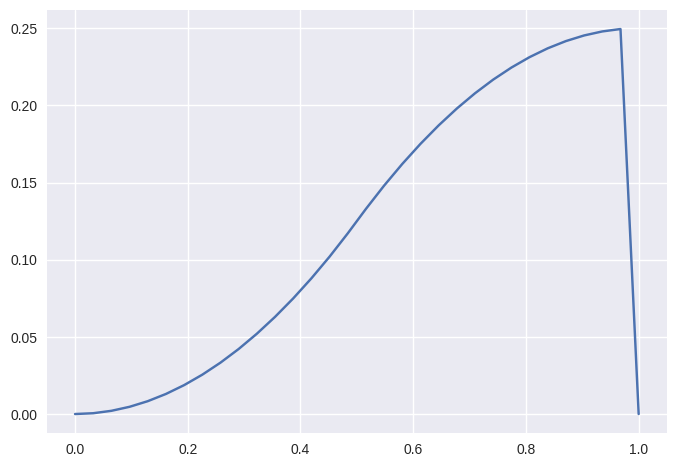

In [6]:
x = np.linspace(0, 1, 32)
J = 3 
i = 2

y = pi2(x, i, J)

plt.plot(x, y.ravel())

In [22]:
x = np.linspace(0, 1, 32)
J = 3 
i = 2

y = haar(x, i, J)

plt.plot(x, y.ravel())

[0.] [0.5] [1.]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [20]:
y.ravel()

array([0.        , 0.03225806, 0.06451613, 0.09677419, 0.12903226,
       0.16129032, 0.19354839, 0.22580645, 0.25806452, 0.29032258,
       0.32258065, 0.35483871, 0.38709677, 0.41935484, 0.4516129 ,
       0.48387097, 0.51612903, 0.5483871 , 0.58064516, 0.61290323,
       0.64516129, 0.67741935, 0.70967742, 0.74193548, 0.77419355,
       0.80645161, 0.83870968, 0.87096774, 0.90322581, 0.93548387,
       0.96774194, 0.        ])

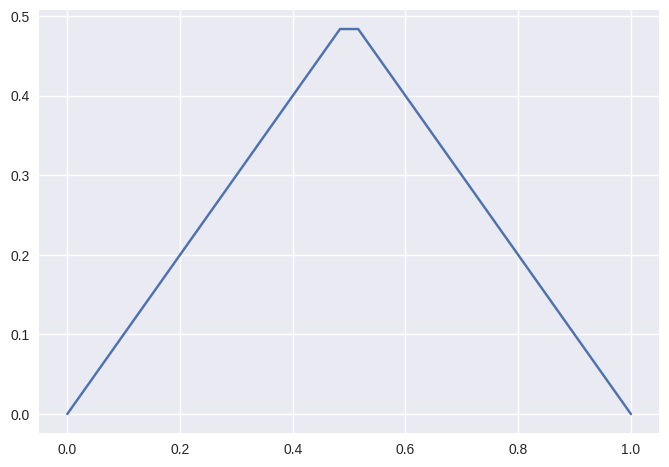

In [23]:
x = np.linspace(0, 1, 32)
J = 3 
i = 2

y = pi1(x, i, J)

plt.plot(x, y.ravel())

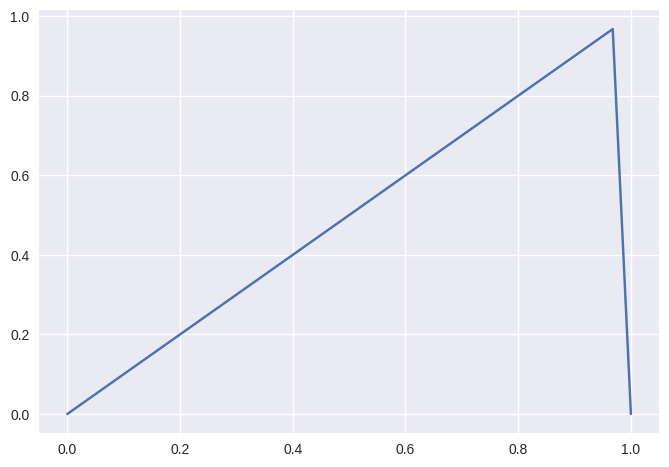

In [10]:
x = np.linspace(0, 1, 32)
J = 4 
i = 1

y = pi1(x, i, J)

plt.plot(x, y.ravel())

In [11]:
pi1([0.5], 1, 3)

array([[0.5]])

In [12]:
pi1([0.99], 2, 6)

array([[0.01]])

In [13]:
pi1([0.1, 0.25, 0.5, 0.75, 0.9], 6, 4)

array([[0., 0., 0., 0., 0.]])

In [14]:
haar([0.99], 2, 6) # + 

a: [0.]

b: [0.5]

g: [1.]



array([[-1.]])

In [15]:
haar([0.5], 1, 3) # + 

array([[1.]])

In [16]:
haar([0.1], 6, 4)

a: [0.25]

b: [0.375]

g: [0.5]



array([[0.]])

In [17]:
haar([0.1, 0.25, 0.5, 0.75, 0.9], 6, 4)

a: [0.25]

b: [0.375]

g: [0.5]



array([[0., 1., 0., 0., 0.]])

In [18]:
def haar(x, i, J): 
    if i == 1:  
        m = k = 0 
    else: 
        IMat = np.zeros((J+1, 2**J))
        IMask = IMat 

        ind_s = 1
        for ind_j in range(0, J): 
            for ind_i in range(0, 2**ind_j): 
                ind_s += 1
                IMask[ind_j, ind_i] = ind_s 
                IMat[ind_j, ind_i] = ind_i + ind_j + 1 

        (ind_j, ind_i) = np.where(IMask == i)
        m = 2**(ind_j - 1) 
        k = ind_i 

    y = 0

    if i == 1: 
        #for i in range(len(x)): 
        if 0 <= x < 1: 
            y = 1 
        else: 
            y = 0 

    else: 
        alpha = k / m 
        beta = (k + 0.5) / m 
        gamma = (k + 1) / m 

        print(alpha, beta, gamma)

        #for i in range(len(x)): 
        if alpha <= x < beta: 
            y = 1 
        elif beta <= x < gamma: 
            y = -1
        else: 
            y = 0 

    return y,m,k
    

In [19]:
haar([0.1, 0.25, 0.5, 0.75, 0.9], 6, 4)

[1.5 0.5] [1.75  0.625] [2.   0.75]


ValueError: operands could not be broadcast together with shapes (2,) (5,) 

In [ ]:
J = 3 
N = 2**(J + 1) 
j = np.arange(0, N)
x = (j - 0.5) / N

alpha1 = 0.
beta1 = -1.
a1 = beta1 - alpha1 

W =  np.zeros((N, N)) 
f = np.zeros((N, 1)) 
a = np.zeros((N, 1))

eps = 1.e-4
r = np.ones((N, 1))

iter_idx = 0 

while max(r) > eps: 
    for j in range(N): 
        H = P1 = P2 = 0 
        for i in range(N): 
            H += a[i] * haar
            

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])